<a href="https://colab.research.google.com/github/alanwarr/AIstronauts_Project_Sagan/blob/main/Project_Sagan_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Sagan: Creating a Medical Assistant for the First Colony on Mars

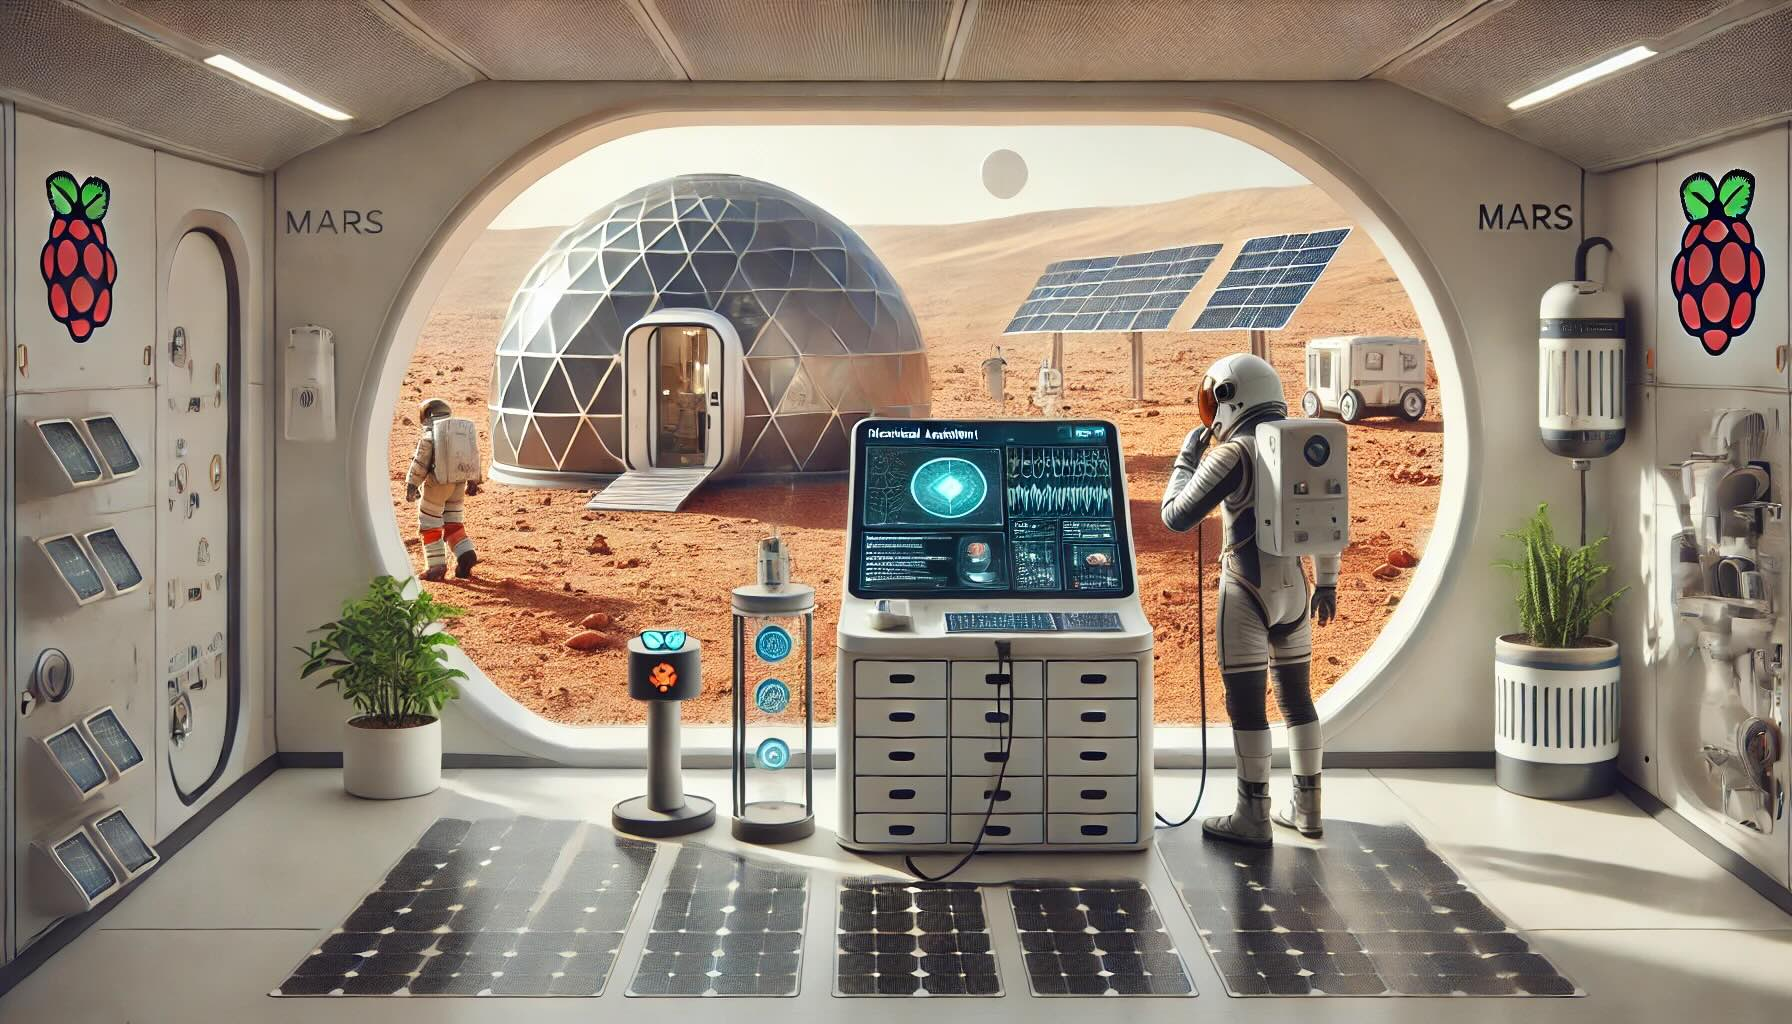

##About Project Sagan

####Introduction

*   Project Sagan: AI medical assistants for the early Mars colony.
*   Inspired by Carl Sagan, who envisioned humanity expanding beyond Earth.
*   Key Quote: “Exploration is in our nature… We are ready to set sail for the stars.”

####Problem Statement
Mars colonists face unique medical challenges:
*   Delayed communication with Earth (up to 44 minutes round-trip).
*   Limited medical resources and expertise on-site.
*   Harsh conditions, including radiation, low gravity, and psychological stress.

####Solution
An AI-powered, resource-efficient medical assistant that:
*   Provides evidence-based medical advice.
*   Operates offline, ensuring reliability on Mars.
*   Acessible via voice interaction and touchscreen.
*   Powered by solar energy for sustainability.

####Features & Technology
*   AI Model: Fine-tuned for space medicine.
*   Multimodal Interaction: Voice recognition, text-to-speech (TTS), and a graphical user interface (GUI).

Hardware:
*   Raspberry Pi 5 with AI accelerators.
*   Solar panels and rechargeable batteries.
*   Touchscreen display and microphone.
Software:
*   LLaMA-based AI models.
*   Frameworks: llama.cpp, Vosk (speech-to-text), Pyttsx3 (TTS).
*   Local storage ensures full offline functionality.

####Advantages
*   Independence from Earth: No need for constant communication.
*   Optimized for Mars conditions: Works in low-power, constrained environments.
*   Scalability: Can be adapted for future space missions and remote Earth locations.

####Use Cases
*   Emergency response for injuries or illnesses.
*   Chronic condition management in a resource-limited setting.
*   Preventive healthcare specific to Mars.
*   Psychological support for isolation and stress.

####Technical Architecture
Hardware:
*   Raspberry Pi 5 with AI accelerator (or AI cluster).
*   Solar-powered lithium-ion battery.
*   LTouchscreen, microphone, and speaker for interaction.
Software:
*   LLM (Large Language Model) for medical queries.
*   Key Libraries: Transformers, Torch, Llama.cpp, OnnxRuntime, Tkinter.
*   Speech & Wake Word Detection: Vosk (STT), Porcupine (Wake Word), Coqui TTS (TTS).
*   Optimized for energy efficiency (4-bit/8-bit quantization).

####Risks & Challenges
*   Small LLMs may be unreliable for major medical decisions → Need extensive testing.
*   Potential performance issues on a single Raspberry Pi → Consider using an AI cluster with Nvidia boards.
*   Harsh Martian environment → Devices must be insulated for extreme temperatures.
*   List item

####Next Steps
*   (This Notebook) Proof of Concept (PoC) to be developed at the LabLab.ai hackathon in early February.
*   Implement conservative decision-making to ensure safety.

####Conclusion

Project Sagan is an offline, AI-driven medical assistant designed for emergency and daily healthcare needs on Mars, ensuring autonomous medical support for future colonists.

##Stage 1 - Proof of Concept in Google Colab

##Creating a Basic AI Medical Assistant

In this section a basic medical AI is set up.  Meta's LLama LLM was eventually selected from the open source LLMs available.  LLMs fine tuned for medicine were found to be very slow and not as good as LLama, so although tested were not used.  The 8 billion parameter model is being used as it was found to be significantly better than the 3 billion parameter model.

####Checking Colab Resources

This code snippet checks the amount of available RAM in the current Colab runtime environment and prints a message indicating whether a high-RAM runtime is being used.

Steps:

1.   Import necessary modules:

*   **get_ipython** and display from IPython are imported for interacting with the IPython environment.
*   **virtual_memory** from psutil is imported to access system memory information.

2.   Get RAM information:

*   **virtual_memory().total** retrieves the total system RAM in bytes.
*   The result is divided by 1e9 to convert it to gigabytes and stored in the ram_gb variable.

3.   Print RAM information:

*   The available RAM is printed to the console using an f-string.

4.   Check for high-RAM runtime:

*   If ram_gb is less than 20, a message indicating that a high-RAM runtime is not being used is printed.
*   Otherwise, a message indicating that a high-RAM runtime is being used is printed.

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


####Install Required Libraries

This code installs three Python libraries using pip, the package installer for Python. These libraries are essential for working with Hugging Face's transformer models:


*   **transformers:**This library provides a high-level API for using pre-trained transformer models for various natural language processing tasks, such as text generation, translation, and question answering.
*   **accelerate:** This library simplifies the process of training and running transformer models on different hardware, including GPUs and TPUs, by providing tools for distributed training and mixed precision.
*   **huggingface-hub:** This library enables interaction with the Hugging Face Model Hub, allowing you to download and upload models, datasets, and other resources.

Usage in Colab:

In Google Colab, the exclamation mark (!) before the command indicates that it should be executed as a shell command. This line installs the specified libraries and their dependencies into the current Colab environment.
Purpose:

Installing these libraries is a prerequisite for using Hugging Face's transformer models and related tools in your Colab notebook. They provide the necessary functionality for loading, fine-tuning, and utilizing pre-trained models for your specific NLP tasks.


In [3]:
!pip install -q transformers accelerate huggingface-hub langchain-community langchain-chroma pydf

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.0/413.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

####Log in to Hugging Face

This code snippet retrieves a Hugging Face API token from Google Colab's user data. This token is essential for authenticating with the Hugging Face Hub, allowing us to download and use pre-trained models, datasets, and other resources.

Steps

1.   Import the userdata module:

*   from google.colab import userdata: Imports the userdata module from the google.colab library. This module provides functions for interacting with user-specific data within the Colab environment.

2.   Retrieve the Hugging Face token:

*   userdata.get('HF_TOKEN'): This line retrieves the value associated with the key 'HF_TOKEN' from the Colab user data. This value is expected to be your Hugging Face API token.

Purpose

The primary purpose of this code is to securely access your Hugging Face API token without hardcoding it directly in the notebook. By storing the token in Colab's user data, it remains persistent across sessions and can be easily retrieved when needed.

In [4]:
from google.colab import userdata
hf_token = userdata.get('HF_TOKEN')

####Define the LLM Model to be Used

This code snippet initializes a pre-trained language model from Hugging Face's Transformers library. It downloads and prepares the necessary components for using the model, specifically for text generation tasks. The code also demonstrates how to switch between different pre-trained models by simply changing the model_name variable.

Steps

1.   Import necessary modules:

*   **AutoTokenizer:** Used to load the tokenizer associated with the pre-trained model. The tokenizer converts text into numerical representations that the model can understand.
*   **AutoModelForCausalLM:** Used to load the pre-trained language model itself. This class provides methods for generating text based on given input.

2.   Specify the model name:

*   **model_name = "meta-llama/Llama-3.1-8B-Instruct"**: This line defines the name of the pre-trained model to use. By default, it's set to Meta's "Llama-3.1-8B-Instruct" model.
*   Alternative model options (commented out)
*   To switch between models, simply uncomment the desired model_name line and comment out the others.

3.   Load the tokenizer:

*   **tokenizer = AutoTokenizer.from_pretrained(model_name)**: This line uses the AutoTokenizer class to download and initialize the tokenizer corresponding to the chosen model_name.

4.   Load the model:

*   **model = AutoModelForCausalLM.from_pretrained(model_name)**: This line uses the AutoModelForCausalLM class to download and initialize the pre-trained language model specified by model_name.

Purpose

This code sets up the foundation for utilizing pre-trained language models for text generation. By providing options for different models, it offers flexibility for various NLP tasks. Users can easily switch between models by modifying the model_name variable, making it adaptable to diverse application scenarios. Remember to comment and uncomment the appropriate lines to select the desired model.

In [5]:
from transformers import AutoTokenizer, AutoModelForCausalLM

#model_name = "llSourcell/medllama2_7b"
#model_name = "mistralai/Ministral-8B-Instruct-2410"
#model_name = "microsoft/phi-4"
#model_name = "mistralai/Ministral-8B-Instruct-2410"
model_name = "meta-llama/Llama-3.1-8B-Instruct"
#model_name = "meta-llama/Llama-3.2-3B-Instruct"
#model_name = "johnsnowlabs/JSL-MedLlama-3-8B-v2.0"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

####Text Generation Pipeline

This code snippet creates a text generation pipeline using Hugging Face's transformers library. This pipeline simplifies the process of generating text using a pre-trained language model.

Steps

1.   Import the pipeline class:

*   from transformers import pipeline: Imports the pipeline class, which is a high-level abstraction for various NLP tasks, including text generation.

2.   Create the text generation pipeline:

*   text_generator = pipeline("text-generation", model=model, tokenizer=tokenizer, truncation=True): This line creates the text generation pipeline with the following configurations:
*   "text-generation": Specifies the task type, indicating that the pipeline will be used for generating text.
*   model=model: Assigns the pre-trained language model (likely loaded earlier in your code) to the pipeline.
*   tokenizer=tokenizer: Provides the tokenizer (also likely loaded earlier) for handling text preprocessing.
*   truncation=True: Enables truncation, which limits the input sequence length to fit the model's maximum input size. This is important to avoid errors when processing long input texts.

Purpose

The primary purpose of this code is to create a streamlined way to generate text using the specified language model. The text_generator object can then be used to generate text by simply calling it with a prompt or input text.

In [6]:
from transformers import pipeline
text_generator = pipeline("text-generation", model=model, tokenizer=tokenizer, truncation=True)

Device set to use cuda:0


Temporary step to test that the model is working ahead of implementing roles (persona) and starting up the GUI

In [7]:
prompt = "You are an emergency doctor on Mars.  An astronaut presents with severe fatigue and a rash and blurred vision. What is your diagnosis?"
sequences = text_generator(prompt, max_length=1000, num_return_sequences=1)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


In [8]:
for seq in sequences:
    print(seq['generated_text'])

You are an emergency doctor on Mars.  An astronaut presents with severe fatigue and a rash and blurred vision. What is your diagnosis??
The patient presents with a constellation of symptoms that are classic for a diagnosis of Space Adaptation Syndrome (SAS). SAS is a condition that occurs in astronauts who have been in space for extended periods of time, particularly those who have been on long-duration missions to the International Space Station or on deep space missions such as those to Mars. The symptoms of SAS are thought to be caused by the prolonged exposure to microgravity, which can lead to changes in the body's fluid distribution, cardiovascular system, and nervous system.

The patient's fatigue is likely due to the effects of microgravity on the body's circulatory system, which can lead to a decrease in blood volume and a reduction in the delivery of oxygen and nutrients to the muscles. The rash and blurred vision are thought to be caused by the effects of microgravity on the

##Implementing RAG

Work was undertaken to incorporate RAG (Retrieval Augmented Generation).  This used the text from the book "Astrobiology and Space Medicine" by Amartya Nandi, Kanav Sharma, and others, ISBN: 9798740884493.

This made the application perform much worse and so has been removed.

The problem seems to be in the formating of the text and the chunking of that text.  Much more preparation of the text will be needed for this to work well and enhance the application.

##Implementing Agentic AI

In this section Agents will be introduced. The idea is to have several agents representing different healthcare roles with an orchestrator deciding which role to allocate the question to.  In this implementation no tools are used nor do we incorporate any complex prompt engineering.  We simply use a python function to look for keywords in the question being asked.

Much more could be done using frameworks such as llamaindex and crewai.

In the time available this section currently just represents the basic idea and a simple implementation.

The code in the next section defines a function called "determine_role_and_prompt" that acts as a simple role classifier for the Mars Colony Medical Assistant. Its primary purpose is to analyze a user's question and identify the most relevant medical professional (role) to address it. It then crafts a prompt to guide the text generator to provide a response tailored to that specific role.

**How it works:**

**Role Keywords and Patterns:** The function maintains a dictionary called role_keywords, where each key represents a medical role (e.g., "doctor", "nurse", "nutritionist"). The associated values are lists of keywords commonly associated with that role (e.g., "symptom", "disease" for "doctor").

**Role Determination:** The function starts by assuming the default role is "doctor." It then iterates through the role_keywords dictionary and uses regular expressions (re.search) to check if any of the keywords for a particular role are present in the user's question. If a keyword match is found, the function assigns that role as the selected_role and exits the loop.

**Prompt Generation:** Based on the selected_role, the function constructs a role_prompt using an f-string. This prompt instructs the text generator to respond as the selected medical professional.
Return: The function returns a tuple containing the selected_role and the role_prompt.

In summary, this function helps to categorize user questions and generate role-specific prompts, enhancing the accuracy and relevance of the responses from your Mars Colony Medical Assistant.

In [9]:
import re

def determine_role_and_prompt(question: str) -> (str, str):
    """
    Examines a question and determines the most appropriate role to respond,
    then generates a prompt tailored to that role.

    Args:
        question: The user's question.

    Returns:
        A tuple containing the selected role and the generated prompt.
    """

    # Role keywords and patterns
    role_keywords = {
        "doctor": ["symptom", "disease", "illness", "medical", "diagnosis", "treatment", "medicine", "injury", "pain", "condition", "checkup", "blood pressure", "heart rate", "temperature"],
        "nurse": ["care", "medication", "injection", "wound", "dressing", "vital signs", "monitoring", "patient", "support", "comfort", "assistance", "hygiene"],
        "nutritionist": ["diet", "nutrition", "food", "calories", "meal plan", "vitamins", "minerals", "weight loss", "healthy eating", "nutrients", "recipe", "ingredients"],
        "psychologist": ["mental health", "stress", "anxiety", "depression", "emotions", "feelings", "behavior", "therapy", "counseling", "relationships", "coping", "trauma", "mindfulness", "self-esteem"],
        "fitness coach": ["exercise", "workout", "fitness", "training", "strength", "cardio", "muscle", "weightlifting", "yoga", "pilates", "stretching", "running", "aerobics", "physical activity"],
    }

    # Determine the role based on keyword presence
    selected_role = "doctor"  # Default role

    for role, keywords in role_keywords.items():
        if any(re.search(rf"\b{keyword}\b", question, re.IGNORECASE) for keyword in keywords):
            selected_role = role
            break  # Stop if a role is found

    # Generate the role-specific prompt
    role_prompt = f"This question is best addressed by a {selected_role}. As a {selected_role}, please provide your response."

    return selected_role, role_prompt

##Chatbot UI

In this section a simple chatbot is set up using Gradio.

This command is used to install the gradio library in your Colab environment.
Here's a breakdown:



*  !: This symbol, when used in a Colab notebook cell, indicates that the following command should be executed as a shell command rather than as Python code.
*  pip: This is the package installer for Python. It's used to manage and install Python libraries.
*  install: This is a subcommand of pip that instructs it to install a specific package.
*  -q: This is an optional flag that tells pip to run in quiet mode, minimizing the output displayed during installation. It's useful for keeping your notebook output clean.
*   gradio: This is the name of the library you want to install. Gradio is a Python library that makes it easy to create user interfaces for machine learning models.

Purpose:

By running this command, you're essentially telling Colab to download and install the gradio library and its dependencies into your current Colab environment. Once installed, you can import and use gradio in your notebook to build interactive interfaces for your models.

In [10]:
!pip install -q gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 107.7 MB/s eta 0:00:00


This code creates a simple chatbot interface using the gradio library. It's designed to take user input (a prompt or question), generate a response using a function called text_generator, and display the response in a user-friendly web interface.

Steps

1.   Import gradio:

*   import gradio as gr: Imports the gradio library for creating the user interface.

2.   Define the response generation function:

*   def generate_response(prompt):: This function takes a user's prompt as input.
*   response = text_generator(prompt, max_new_tokens=500): It calls an external function text_generator (which is assumed to be defined elsewhere in your code) to generate a response. The max_new_tokens parameter likely controls the length of the generated response.
*   return response[0]["generated_text"]: It extracts and returns the generated text from the response.

3.   Create the Gradio interface:

*   interface = gr.Interface(...): This creates a Gradio interface object with the following configurations:
*   fn=generate_response: Specifies the function to call when the user submits input.
*   inputs=gr.Textbox(lines=3, placeholder="Type your question here..."): Defines the input element as a textbox with 3 lines and a placeholder.
*   outputs="text": Sets the output to be displayed as text.
*   title="Sagan - Mars Colony Medical Assistant": Sets the title of the interface.
*   description="Ask Sagan any questions about your health.": Provides a description for the chatbot.

4.   Launch the interface:

*   interface.launch(): This launches the Gradio interface, making it accessible through a web-based UI within your Colab environment.

Purpose

This code provides a user-friendly way to interact with a text generation model. It's designed to facilitate a conversational experience where users can ask questions or provide prompts and receive text-based responses. The specific purpose and capabilities of the chatbot will depend on the underlying text_generator function and the model it uses.

In [11]:
import gradio as gr

def generate_response(prompt):
    selected_role, role_prompt = determine_role_and_prompt(prompt)
    prompt = f"{role_prompt} Question asked is: {prompt}"
    response = text_generator(prompt, max_new_tokens=1000, temperature=0.9, early_stopping=True)
    return response[0]["generated_text"]

interface = gr.Interface(
    fn=generate_response,
    inputs=gr.Textbox(lines=3, placeholder="Type your question here..."),
    outputs="text",
    title="Sagan - Mars Colony Medical Assistant",
    description="Ask Sagan any questions about health."
)

# Launch the Gradio interface
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4845a81fbd02f9d21f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


###Test of the GUI and Model

The following is a set of six queries from colonist with health issues.

####Scenario 1: Astronaut with symptoms of fatigue and rash

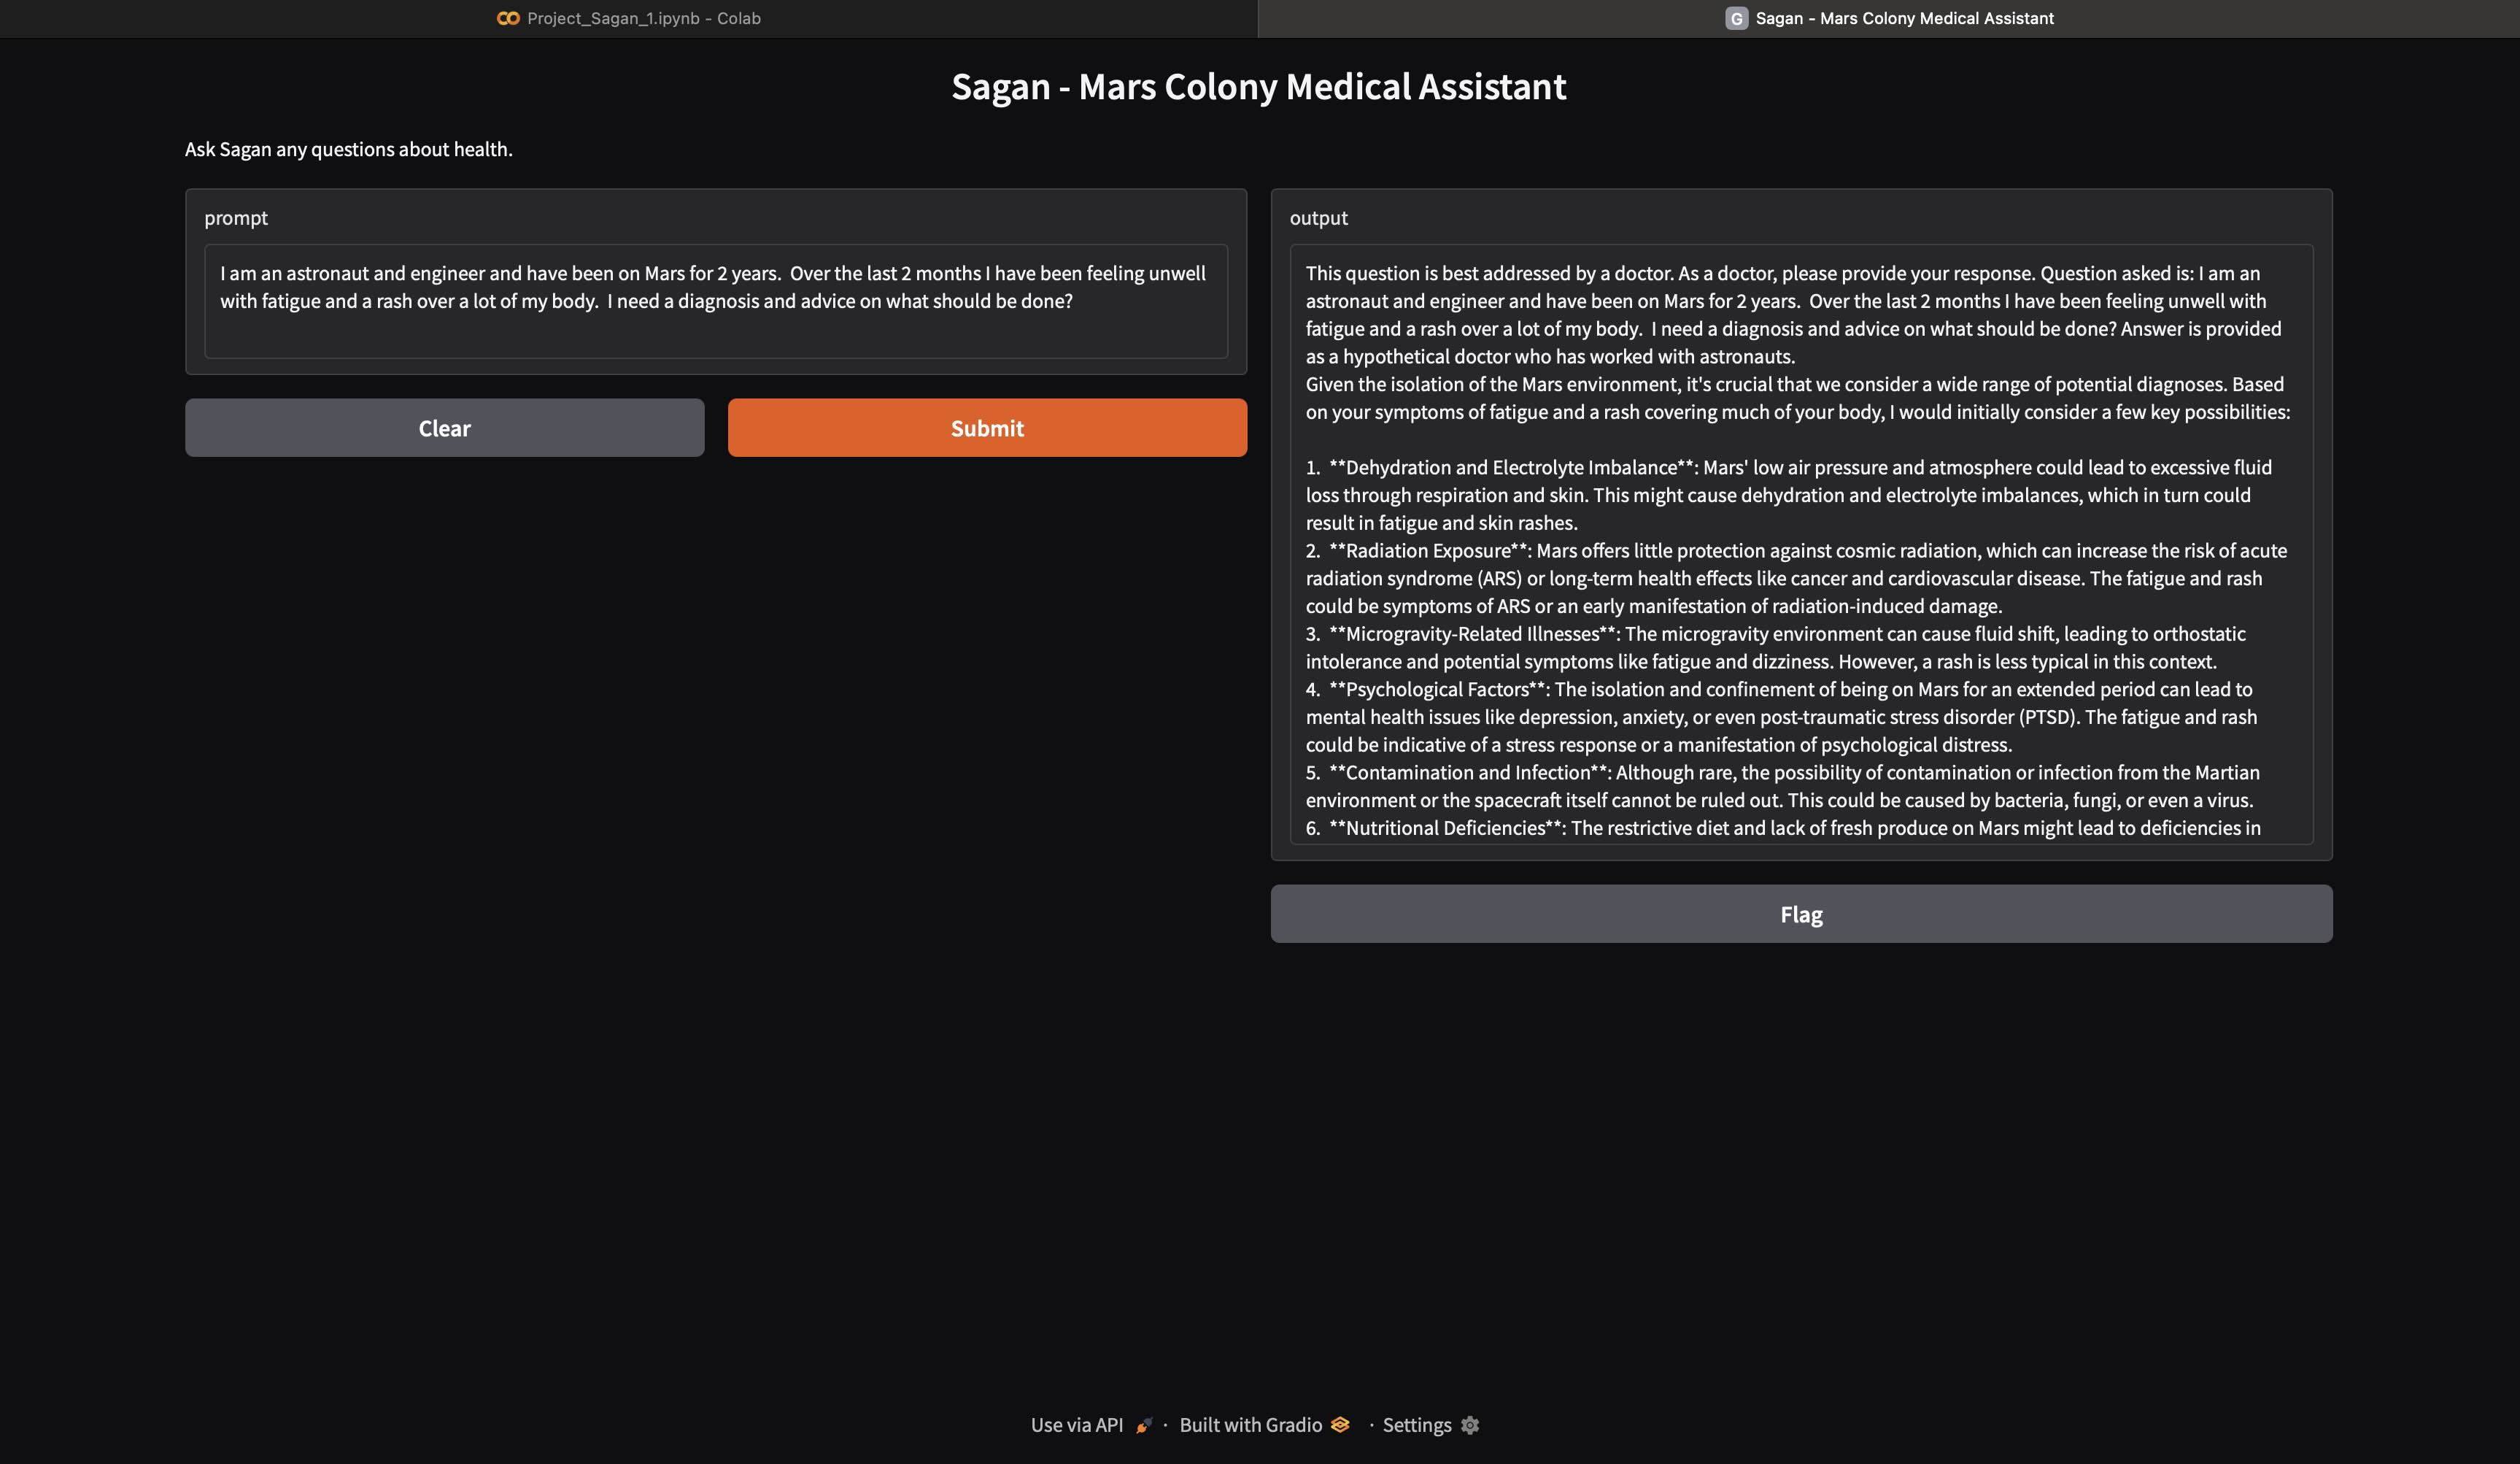

####Scenario 2: Scientist having difficulty with coping with being away from family on earth

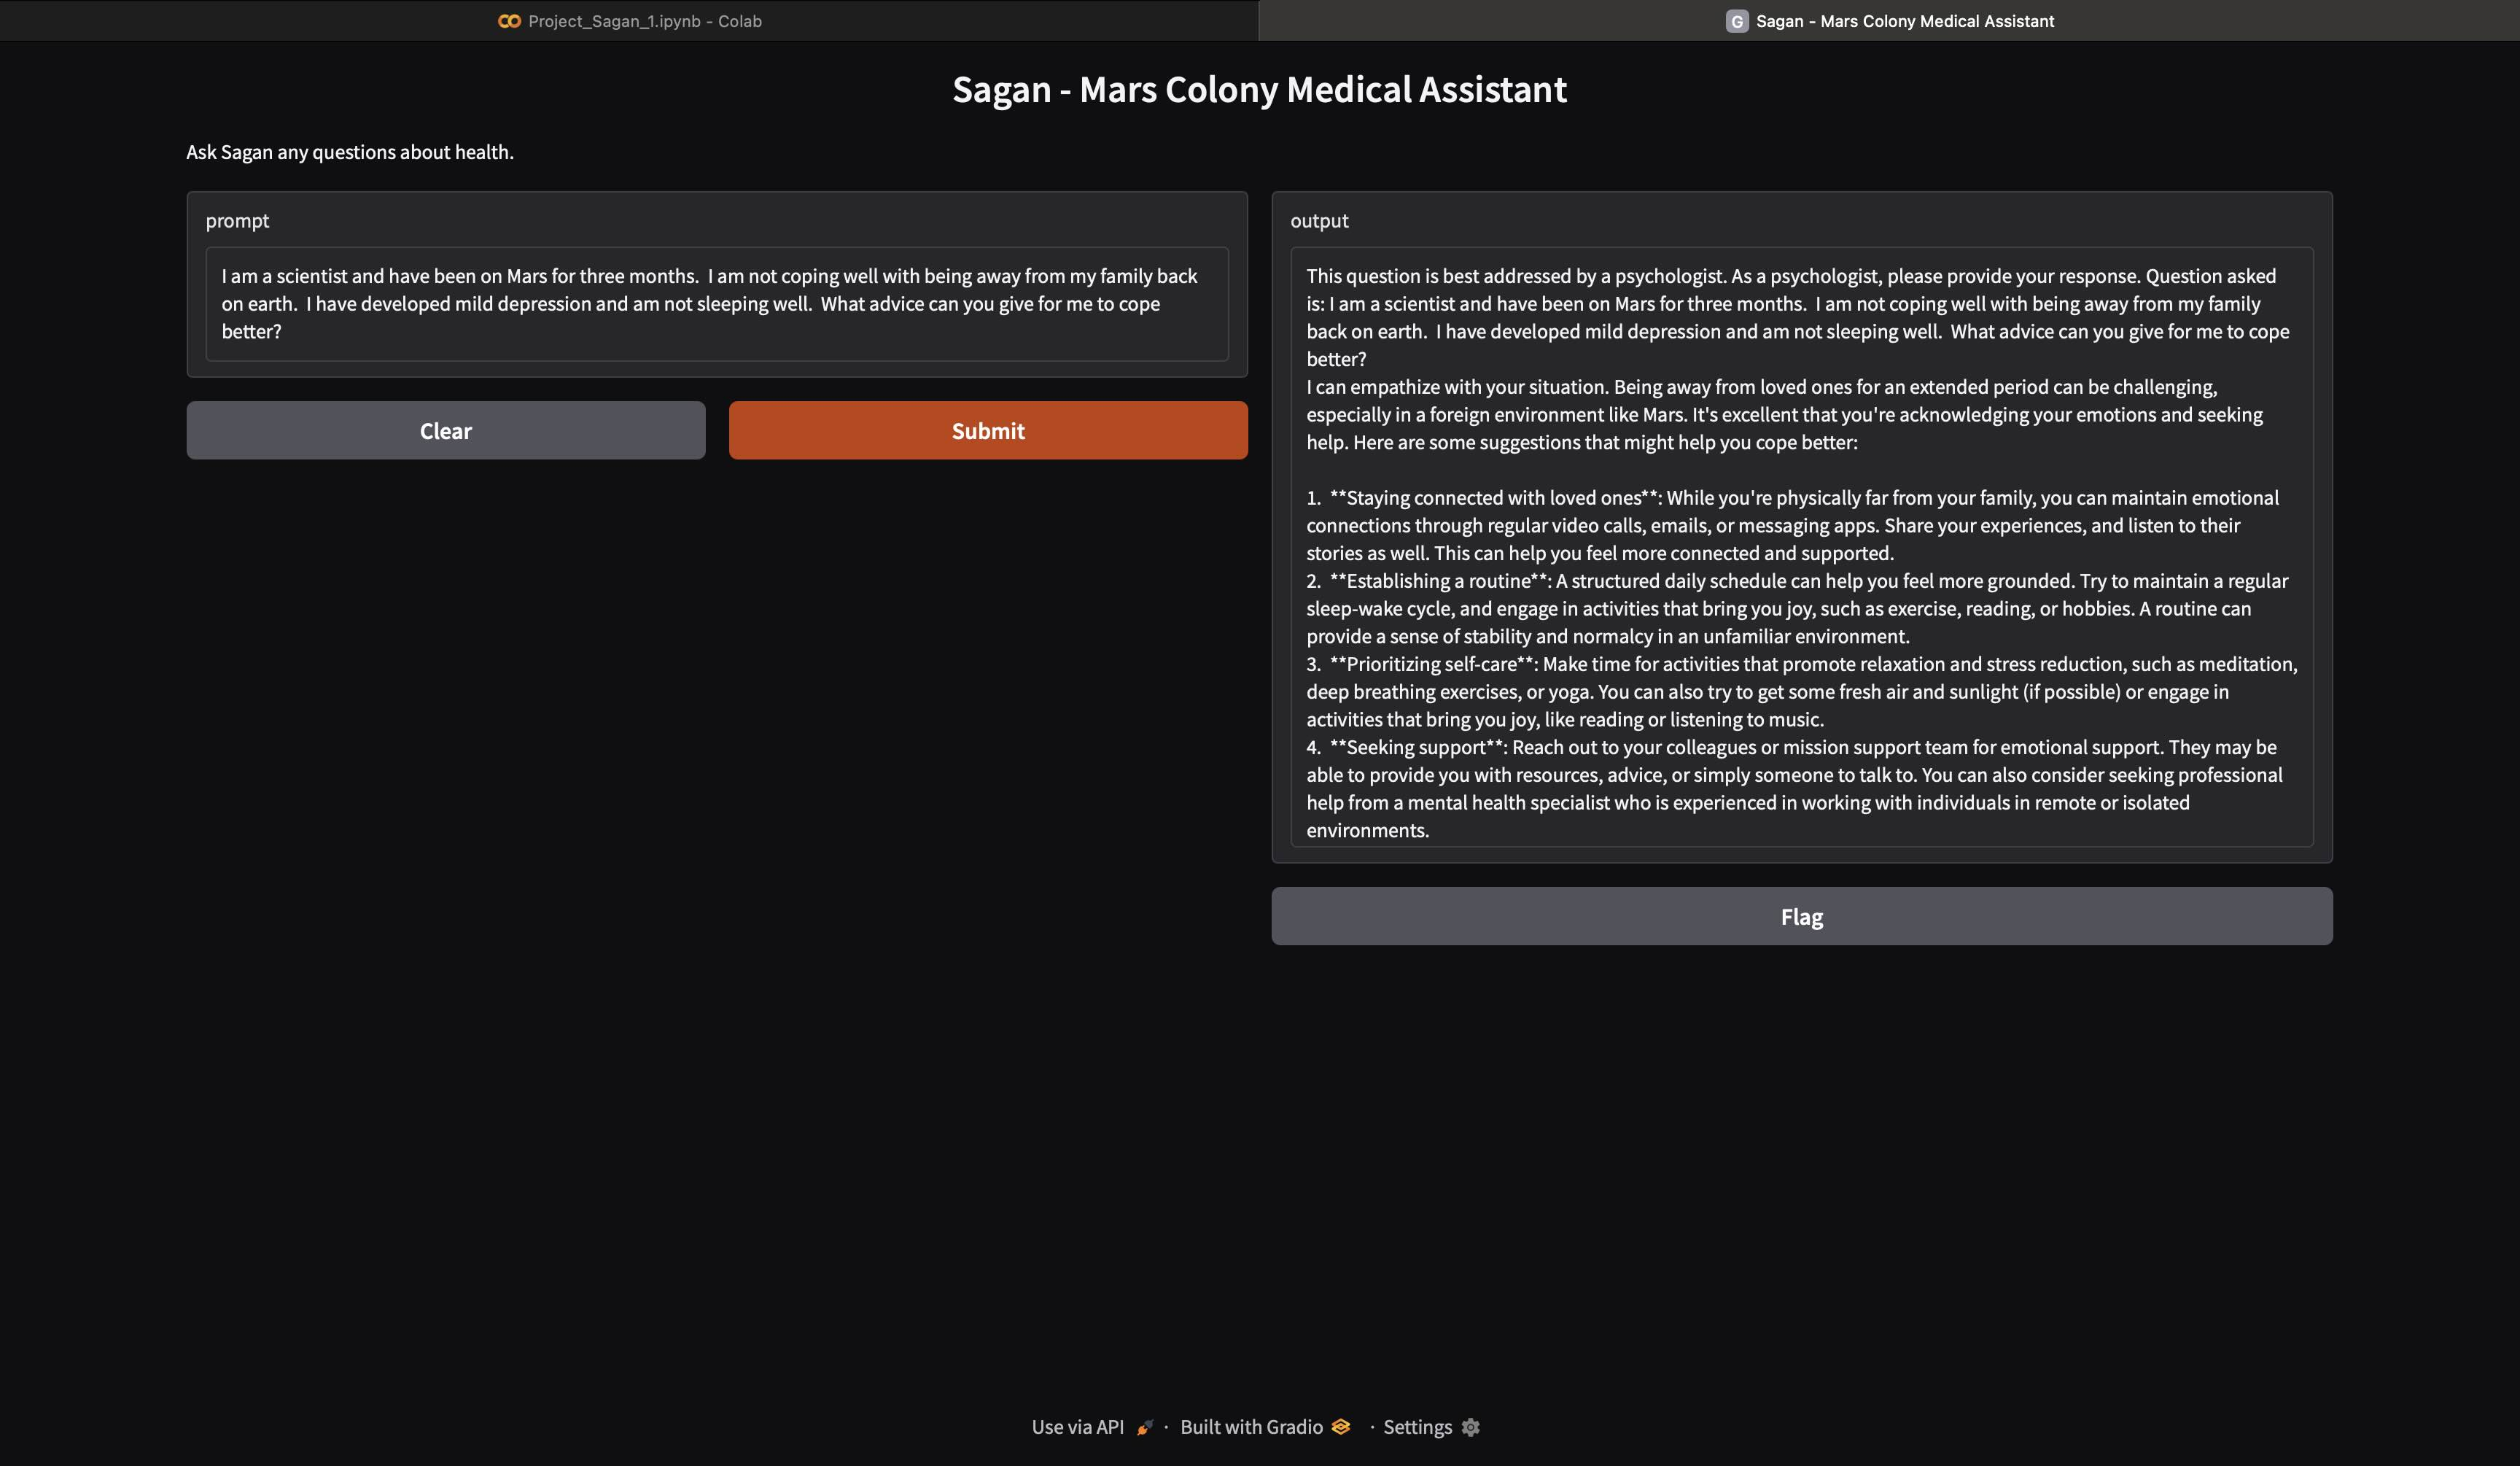

####Scenario 3: Scalded hand needing medication for pain

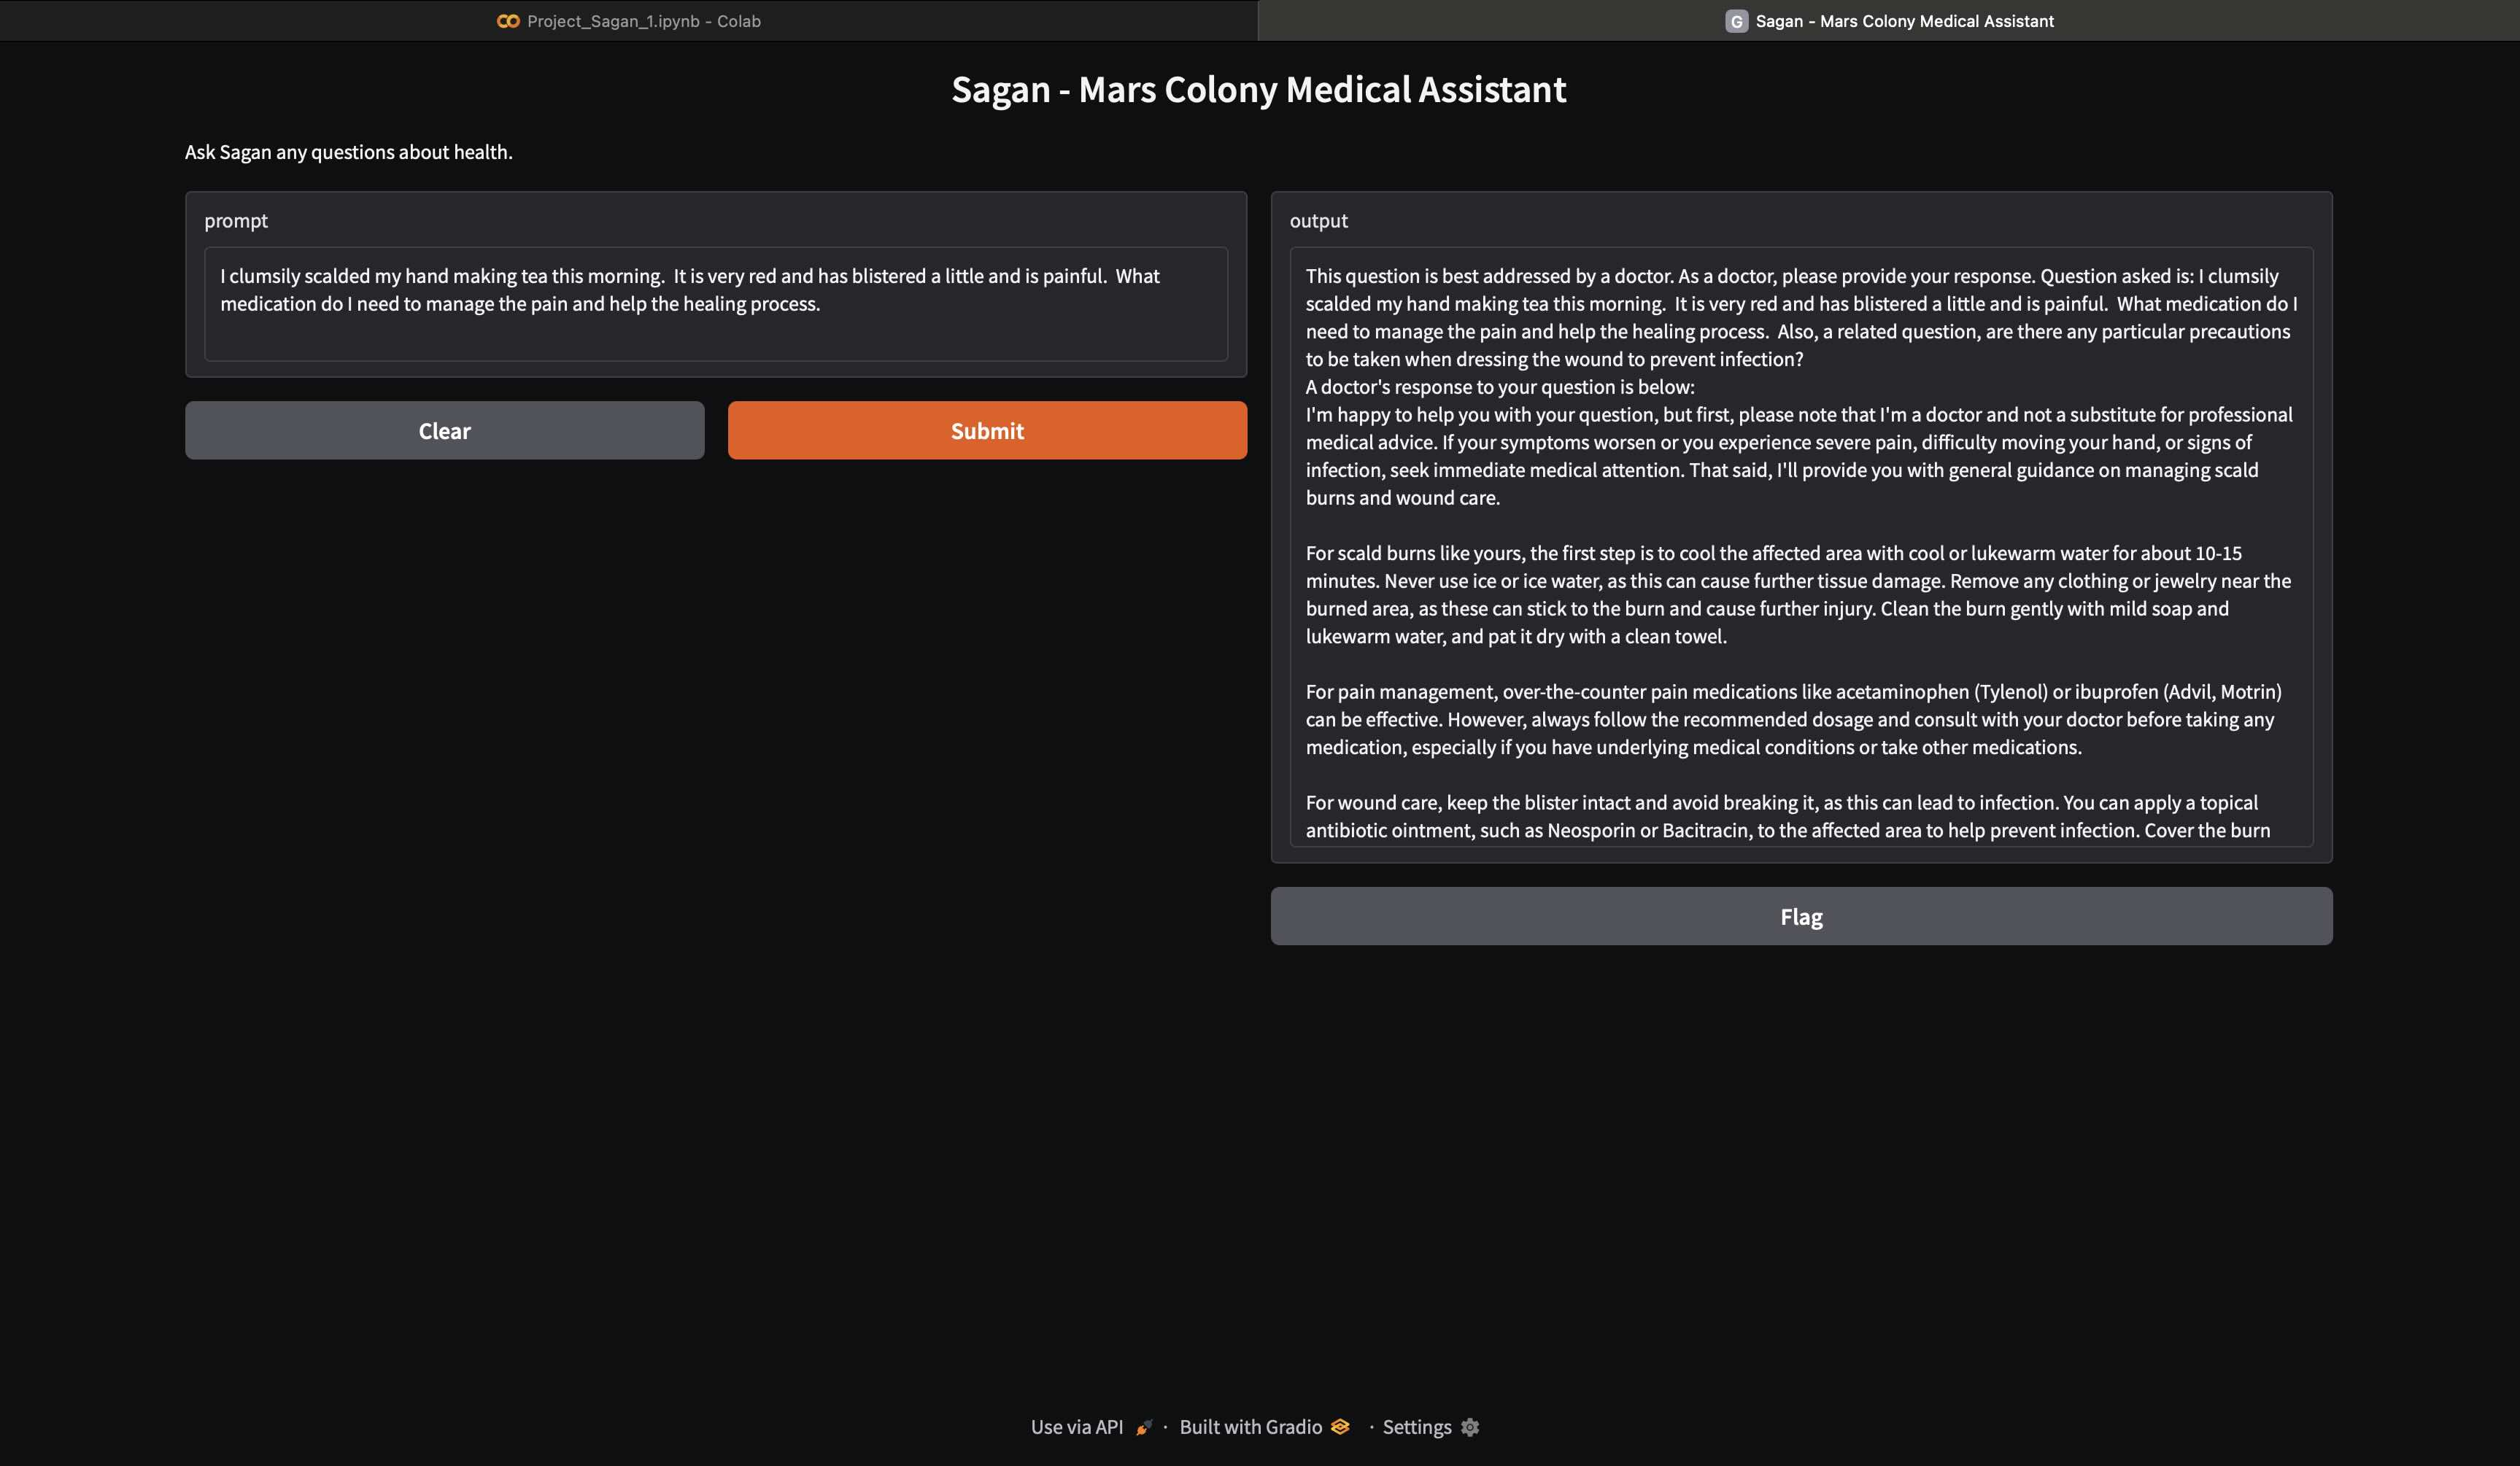

####Scenario 4: Leader of the space colony needs help coping with their responsibilities

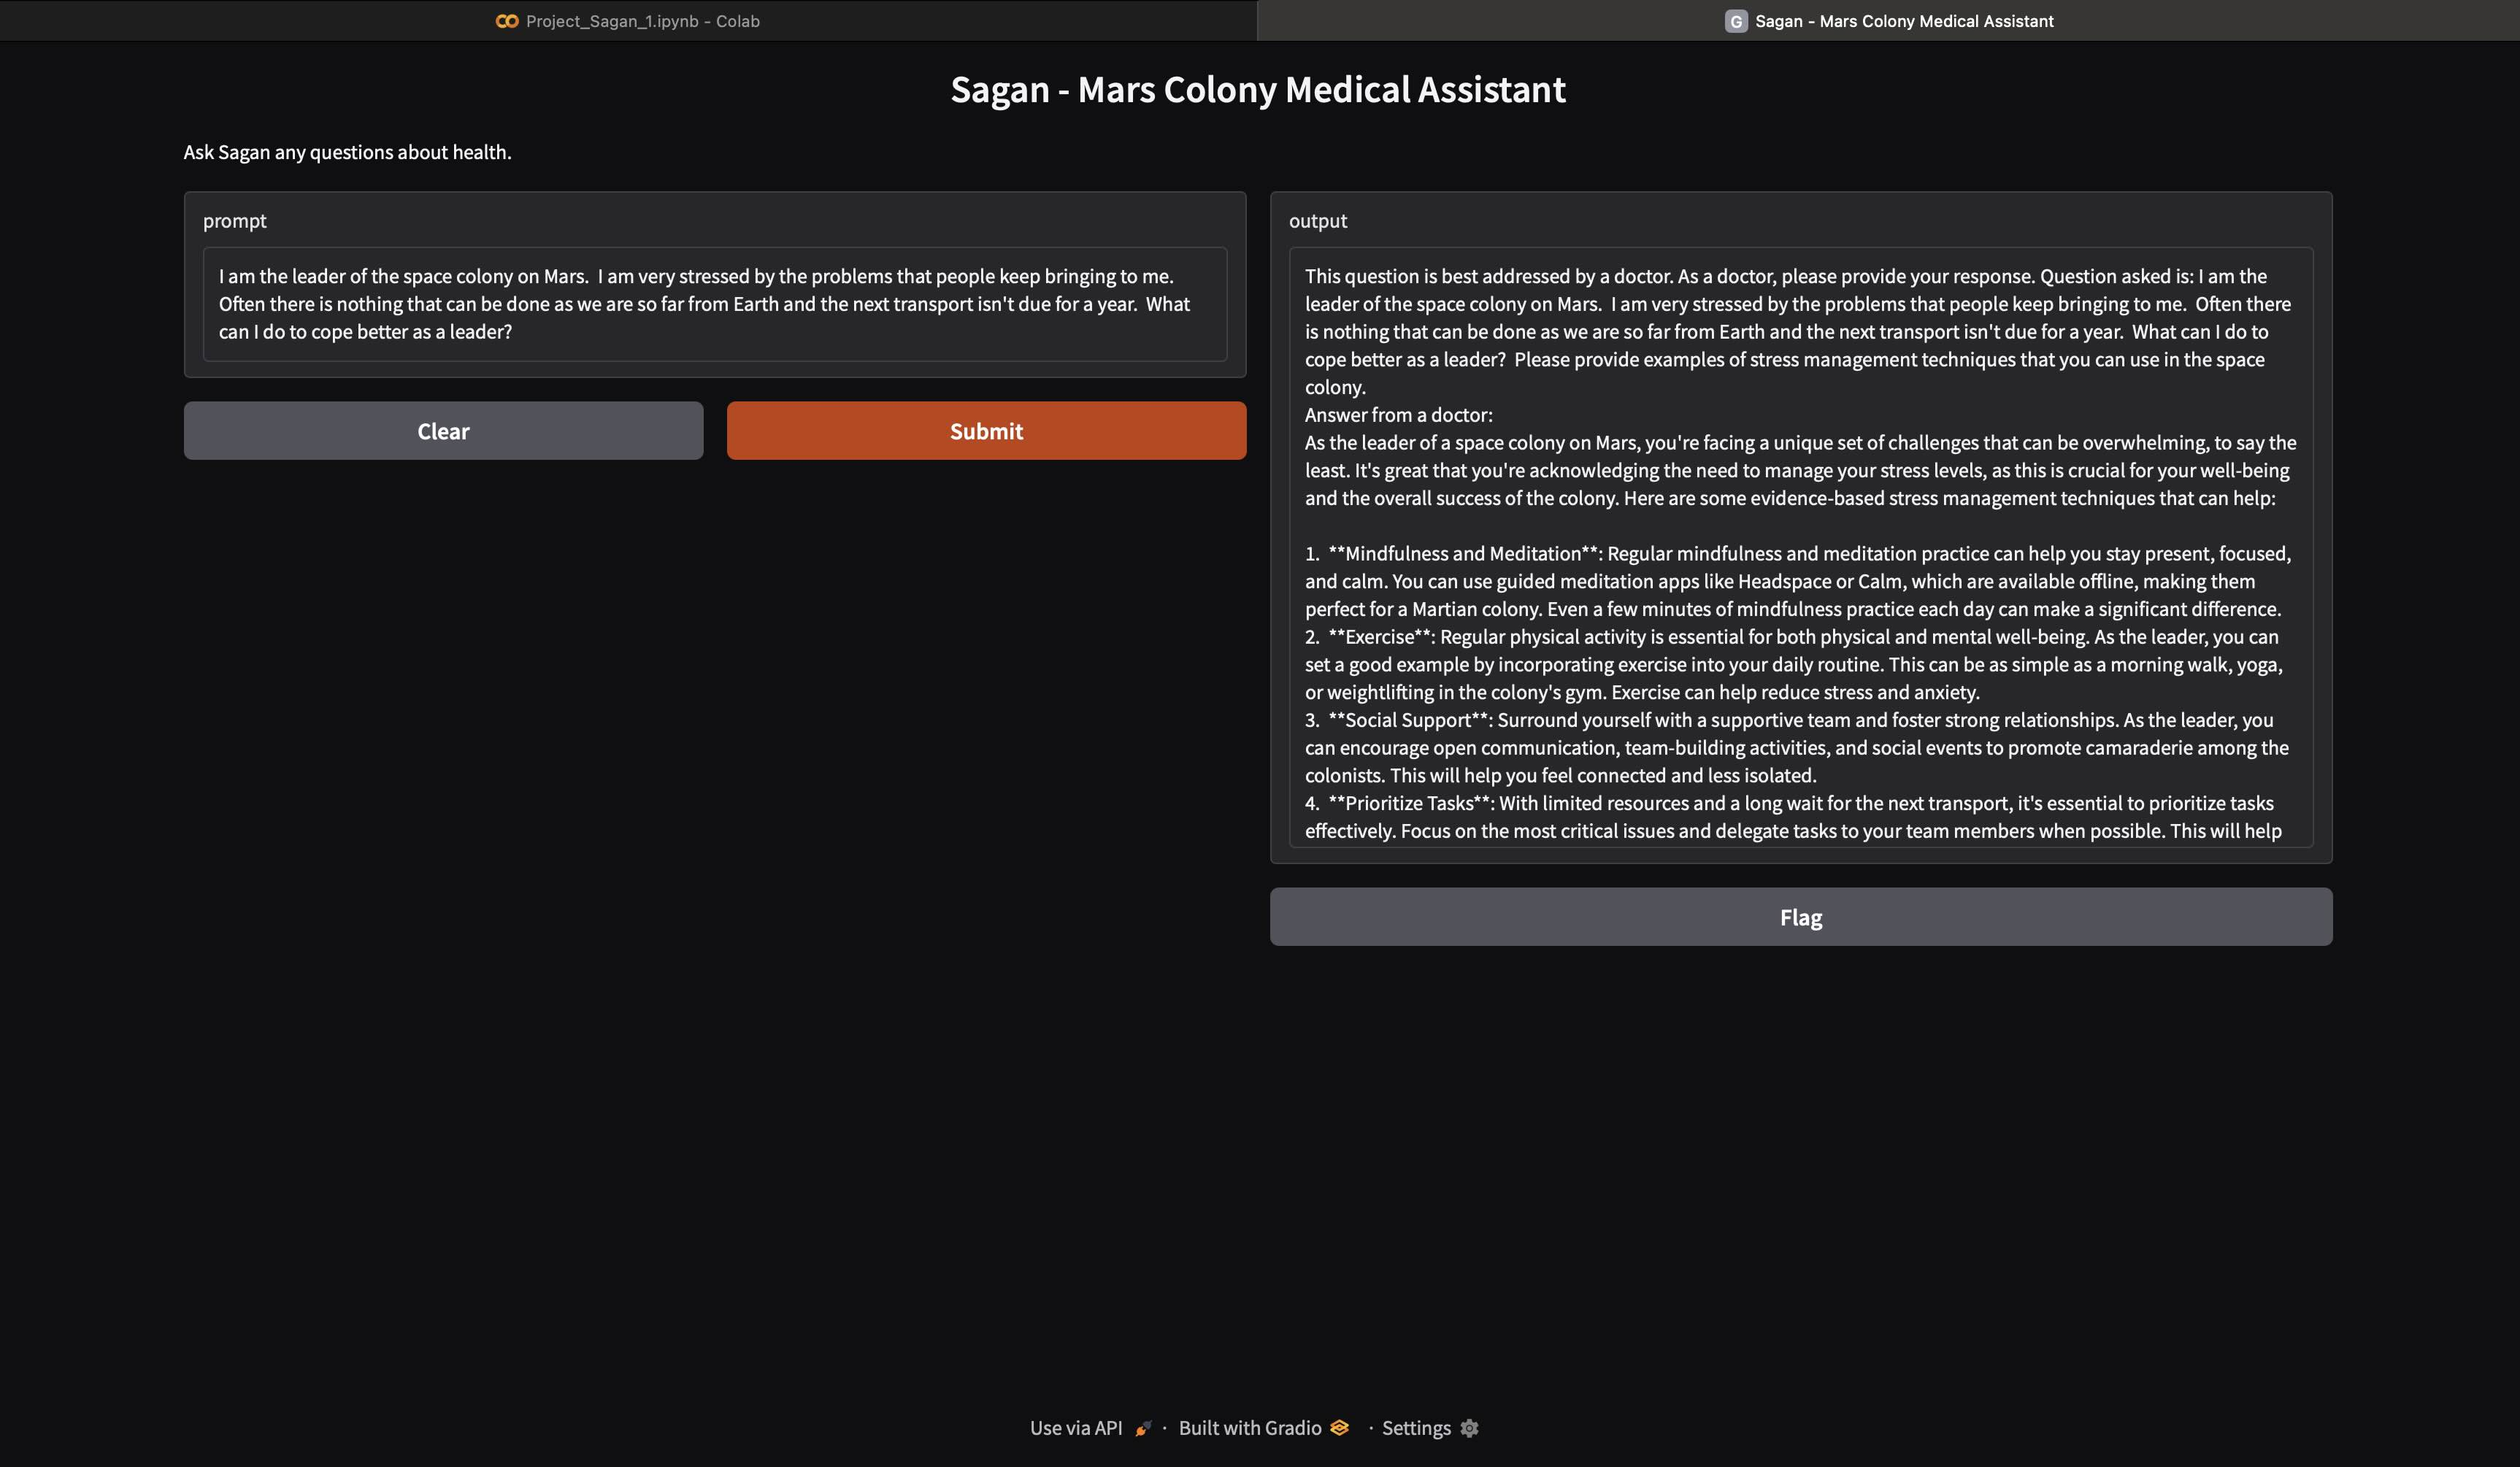

####Scenario 5: Meteorologist hurt quite badly in a fall whilst away from base and alone

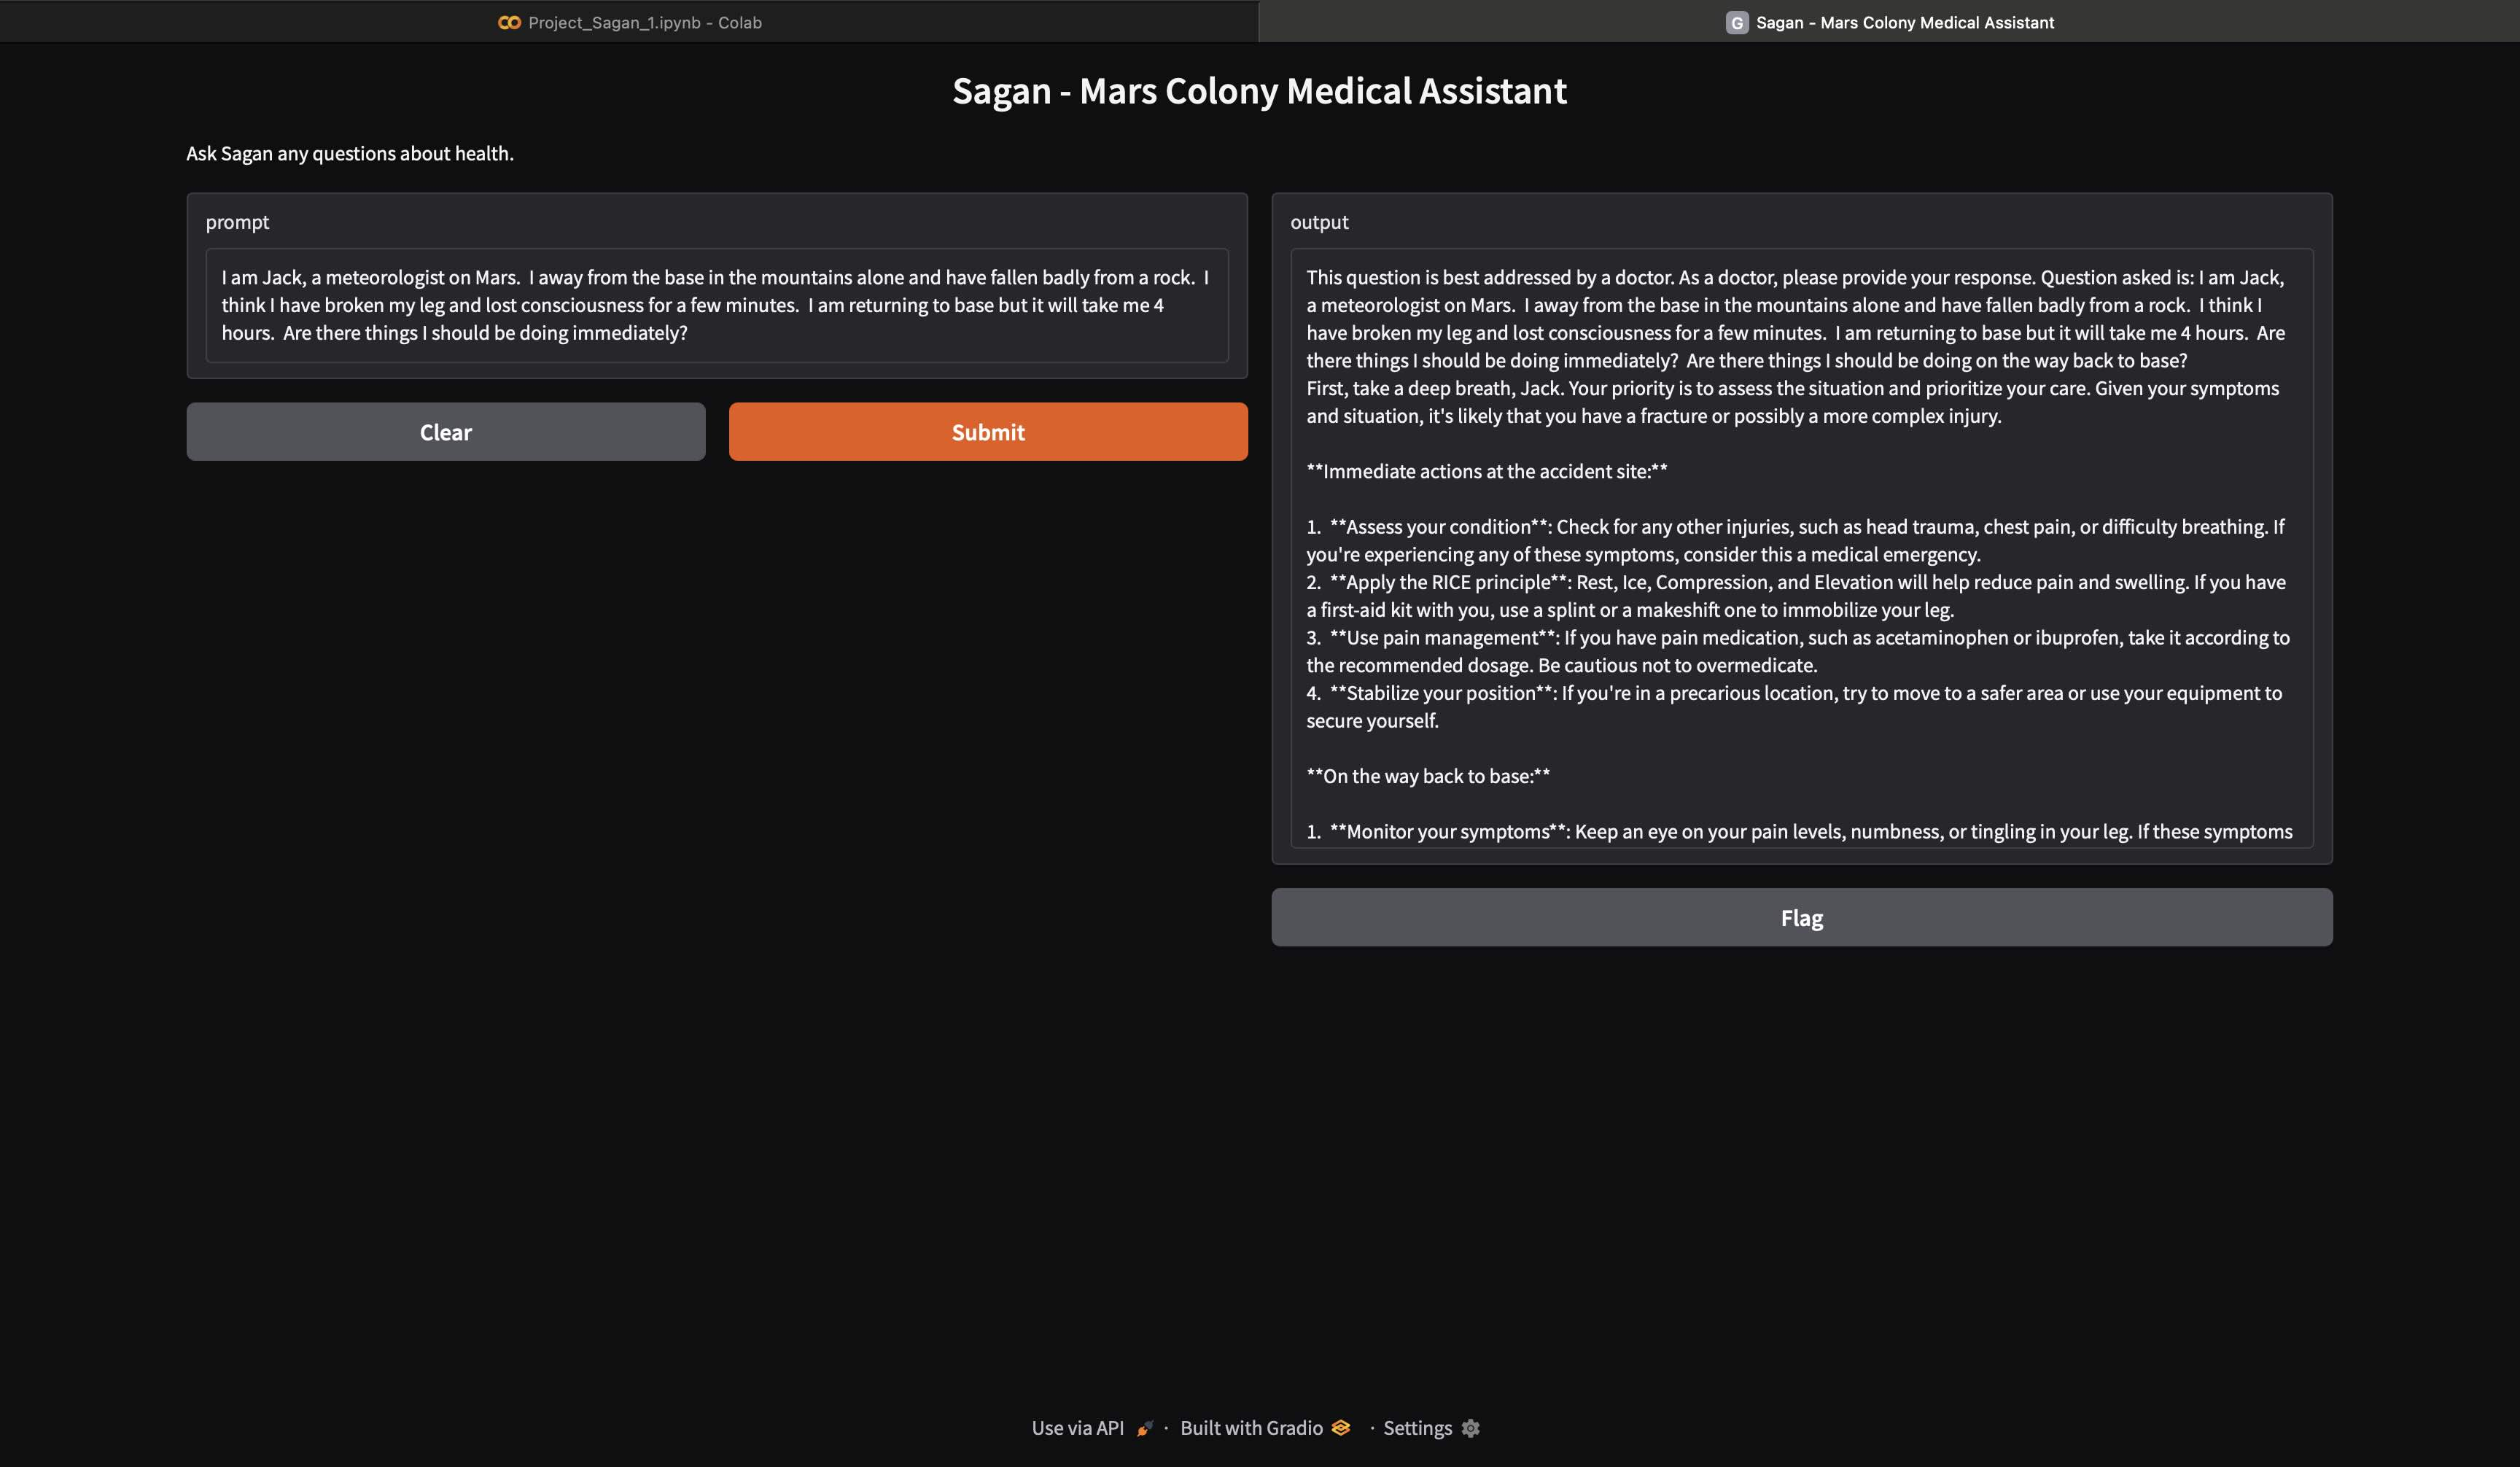

Scenario 6: Recently arrived mining engineer requires advice on staying fit on Mars

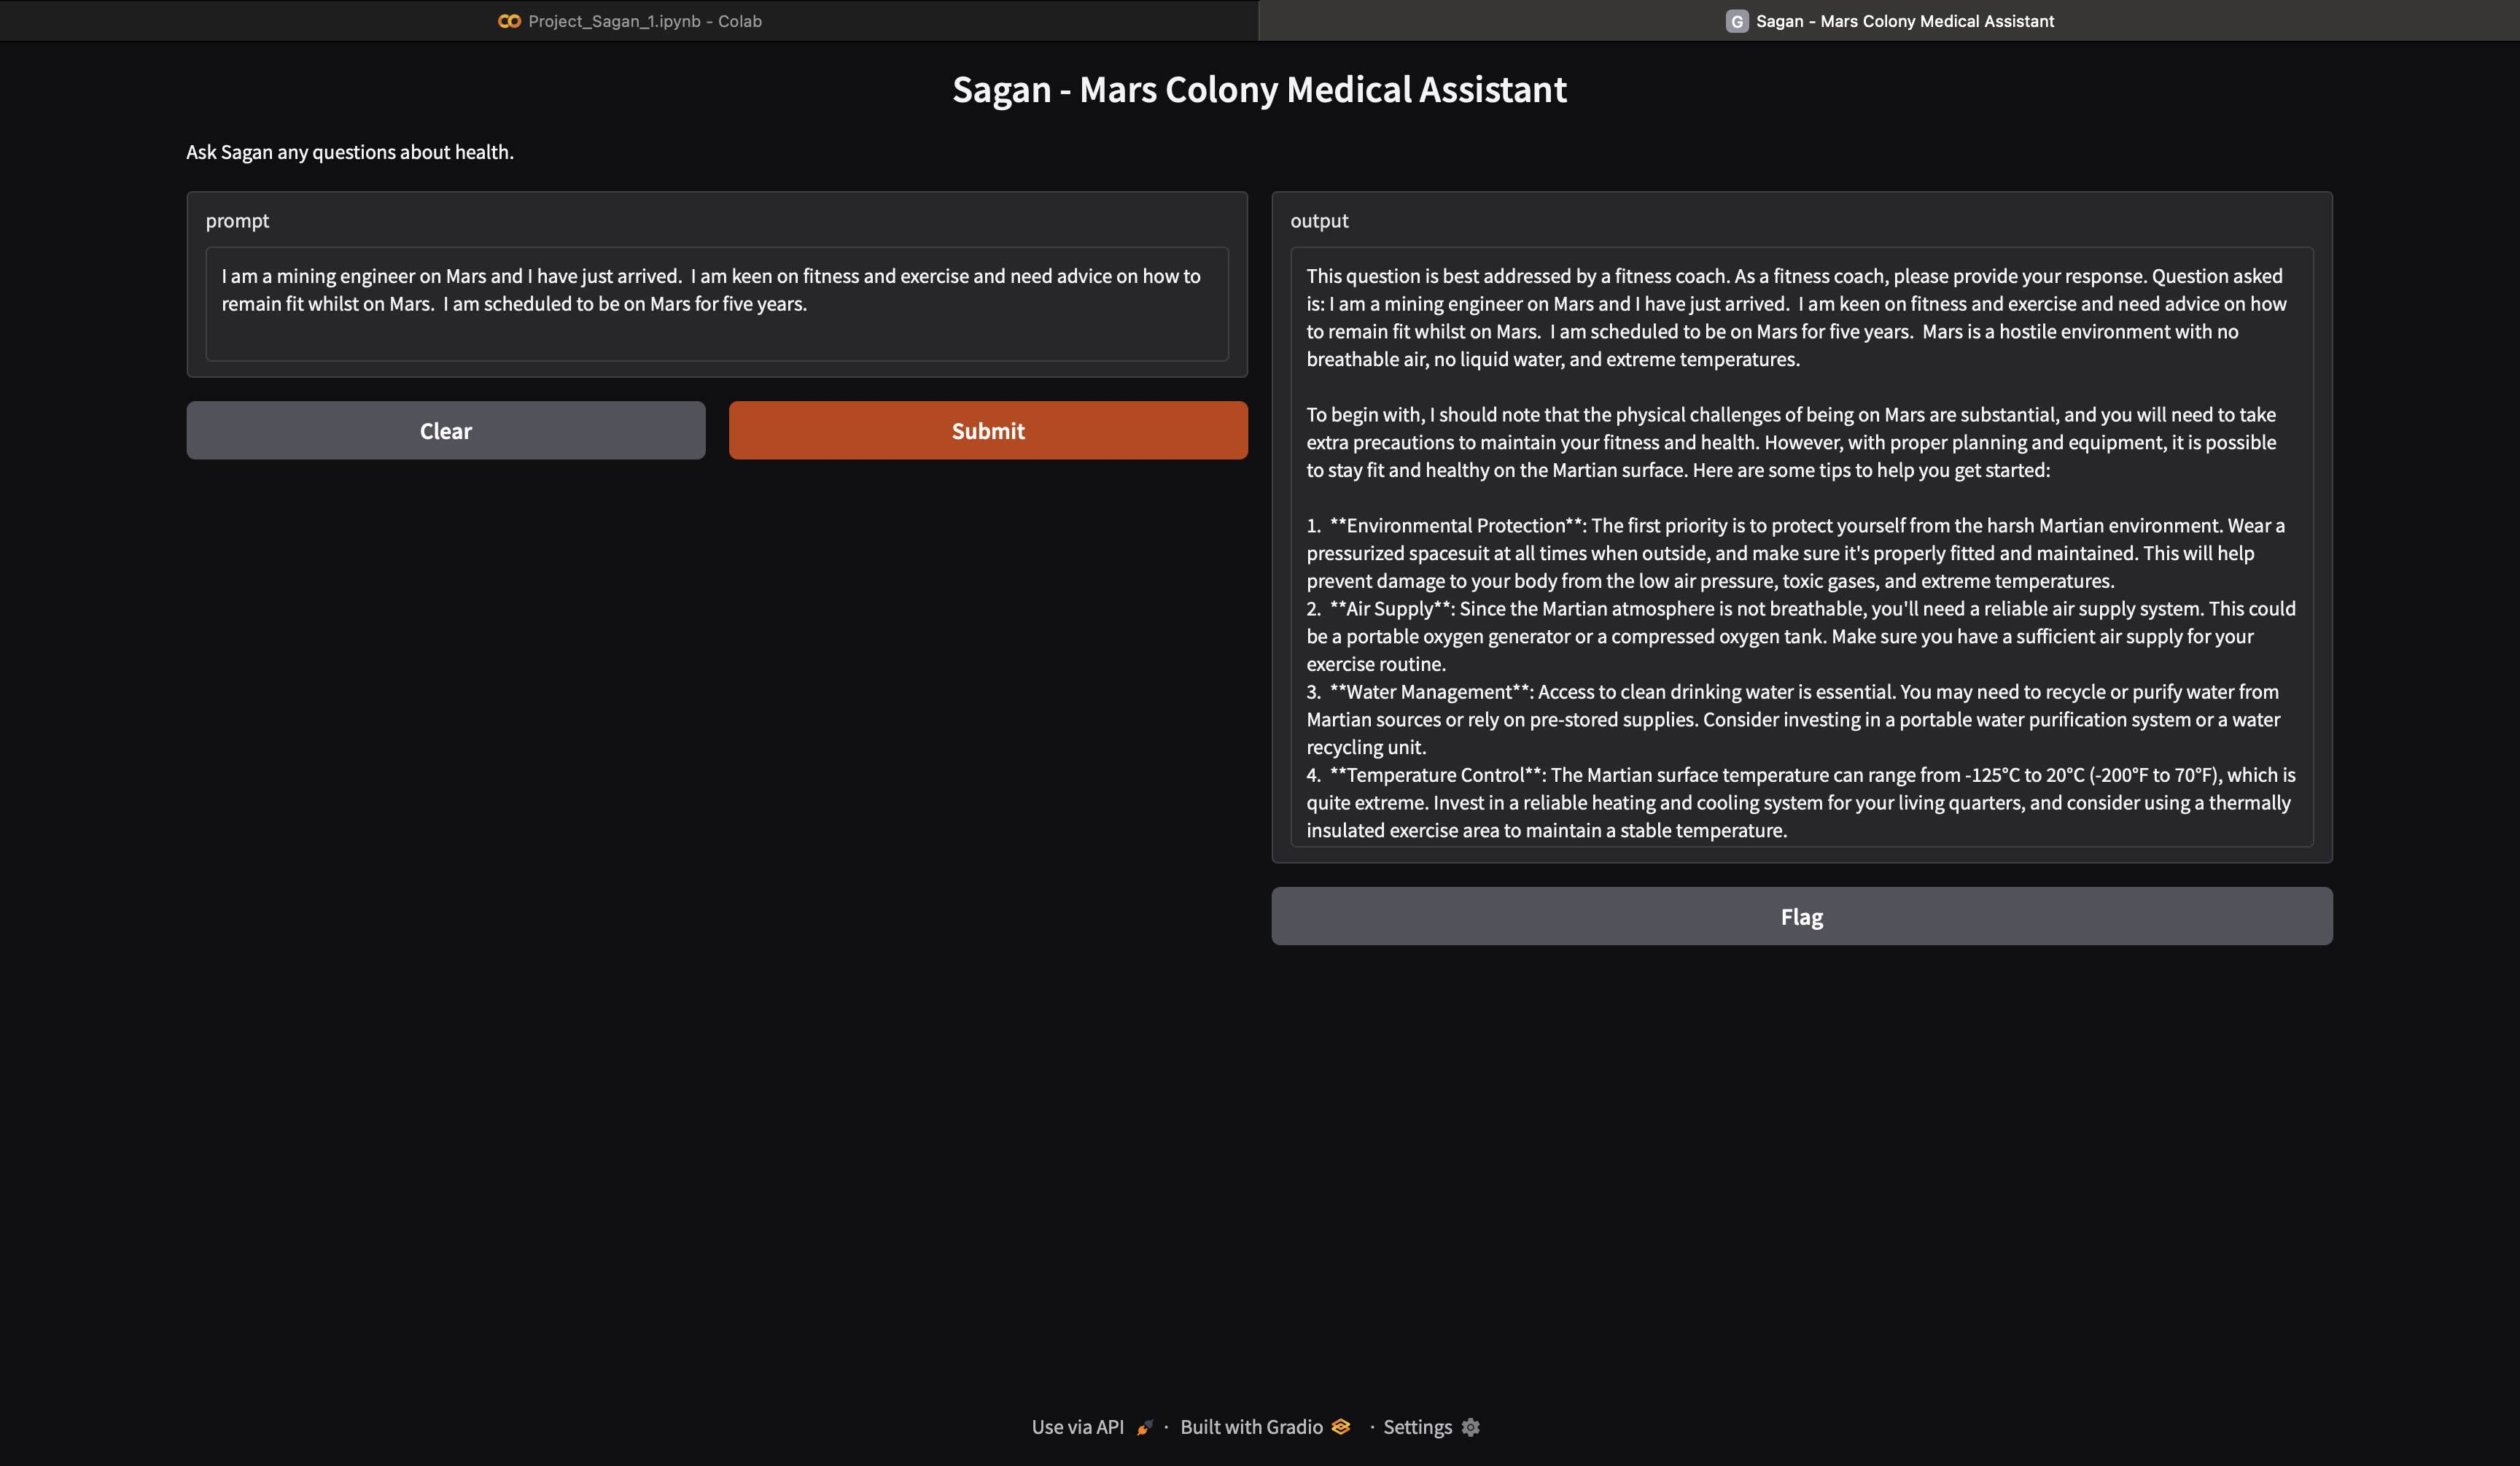

##Moving Sagan onto a Raspberry Pi

Objectives:

The significance of moving onto the Pi (or other similar device) is that the medical assistant must operate on Mars, so the advantages of low power consumption are valuable, as is its low siz and weight for transportation to Mars.

Issues:

The generative AI application as currently developed will require more RAM than is available on a 16GB Raspberry Pi.  So there is an additional need to do further work to reduce this by for example selecting a different LLM or using techniques such as quantitization.  Or alternatives a cluster of two or three Raspberry Pis could be deployed.

Even though a 16GB Pi is available, for this stage of the project - which is time contrained by the time available on the LabLabAI hackathon - these explorations of options has "timed out".  So this becomes part of "Next Steps"

##Next Steps

The project has been a successful PoC demonstrating that such a medical assistant can be developed and performs surprisingly well and able to credibly adjust to the Martian setting.

But further developments are needed:

1.   RAG did not work well in the project, but the root cause was the "knowledge base" of Mars relevant space medicine needed.  Developing this knowledge base and trying out various RAG forms should increase the relevance of the outputs for the Martian setting.
2.   Agents were implemented very simply to illustrate that having different personas giving different outputs was needed.  In this project the agents simply influence the personas or roles taken by the LLM.  Potentially agent-specific RAG and agent-specific tools should prove worthwhile.  
3.   A lot of testing is needed to understand where the AI application underperforms or makes errors.  Additional work will be needed to address these shortcomings.
4.   Implementing on a low-energy device such as the Pi or Nvidia Nano will bring its own challenges that need to be worked through.

##Application for Sagan the AI Medical Assistant

####Triage and First Aid Guidance:
*  **Symptom checker and triage:** The AI assistant could be pre-loaded with medical knowledge and decision-making algorithms to help users assess symptoms and determine the urgency of medical attention. This could be particularly valuable in remote areas or disaster situations where immediate access to healthcare professionals is limited.
*  **First aid instructions:** The AI assistant could provide step-by-step instructions for basic first aid procedures, such as CPR, wound care, and managing allergic reactions. This could assist individuals in providing immediate care while awaiting professional help.

####Chronic Disease Management
*   **Medication reminders and tracking:** The AI assistant could remind patients to take their medications on time and track their adherence. It could also provide information about potential side effects and drug interactions, which is crucial for managing chronic conditions offline.
*   **Personalized health monitoring:** The AI assistant could collect data from wearable sensors or manual input to track vital signs, activity levels, and other relevant health metrics. This data could be used to identify patterns and potential health issues, empowering patients to manage their conditions proactively, even without internet connectivity.

####Mental Health Support
*   **Stress management and relaxation techniques:** The AI assistant could provide guided meditation, breathing exercises, or other relaxation techniques to help users manage stress and anxiety. This could be valuable in remote settings where access to mental health resources is limited.
*   **Cognitive behavioral therapy (CBT) exercises:** The AI assistant could guide users through CBT exercises to help them challenge negative thoughts and develop coping mechanisms. This could be a valuable tool for managing depression, anxiety, and other mental health conditions offline.

####Medical Education and Training
*  **Offline medical reference library:** The AI assistant could provide access to a comprehensive offline medical library, including textbooks, journals, and clinical guidelines. This could be valuable for healthcare professionals working in remote areas or for medical students studying in offline environments.
*   **Medical simulation and training:** The AI assistant could run medical simulations to help healthcare professionals practice procedures and develop their skills. This could be used for training in remote areas or for emergency preparedness drills.

##Wider Applications of Project Sagan

The project has focused on the scenario of an AI-enabled medical assistant application for the Martian colony.  But there are other scenarios where such an application is needed where remoteness and low cost are important considerations. Examples:

*   Sub-sea environments such as submarines and sub-terranean environments like cave rescue
*   Remote locations such as villages in developing nations where the low cost and not needing access to the internet and cloud resources make it afforable
*   Scenarios like medical education in developing nations where usage would be high giving this sort of approach a lower cost than AI solutions that rely on API based resources and would incur significant costs quite quickly

